# Exploratory Data Analysis (EDA)


In [18]:
import hopsworks
import pandas as pd

project = hopsworks.login()
fs = project.get_feature_store()

fg = fs.get_feature_group(
    name="aqi_features",
    version=1
)

df = fg.read()

df.head()

2026-02-14 19:11:05,719 INFO: Closing external client and cleaning up certificates.
Connection closed.
2026-02-14 19:11:05,729 INFO: Initializing external client
2026-02-14 19:11:05,730 INFO: Base URL: https://c.app.hopsworks.ai:443
2026-02-14 19:11:09,503 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1338518
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (3.68s) 


,timestamp,pm25,pm10,co,no2,o3,so2,nh3,aqi,hour,...,month,day_of_week,is_weekend,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_roll_6h,aqi_change_rate,pm25_roll_3h,pm10_roll_6h
0,2025-11-17 21:00:00+00:00,180.63,282.74,1091.45,15.95,64.56,2.66,35.53,5,21,...,11,0,0,5.0,5.0,5.0,5.000000,0.0,175.633333,274.381667
1,2025-10-23 08:00:00+00:00,58.94,102.76,408.74,2.93,156.78,6.25,7.26,4,8,...,10,3,0,4.0,5.0,4.0,4.166667,0.0,64.646667,114.436667
2,2026-02-08 13:00:00+00:00,57.01,88.50,633.61,14.42,109.97,2.44,56.94,4,13,...,2,6,1,4.0,4.0,4.0,4.166667,0.0,57.883333,96.240000
3,2025-11-30 07:00:00+00:00,100.08,160.27,647.27,7.18,118.13,4.39,28.90,5,7,...,11,6,1,5.0,5.0,5.0,5.000000,0.0,118.606667,190.275000
4,2025-10-31 23:00:00+00:00,109.65,196.43,602.06,7.54,75.96,4.30,31.76,5,23,...,10,4,0,5.0,5.0,5.0,5.000000,0.0,106.696667,180.473333


## Basic Data Inspection

In [19]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype                  
---  ------           --------------  -----                  
 0   timestamp        2828 non-null   datetime64[us, Etc/UTC]
 1   pm25             2828 non-null   float64                
 2   pm10             2828 non-null   float64                
 3   co               2828 non-null   float64                
 4   no2              2828 non-null   float64                
 5   o3               2828 non-null   float64                
 6   so2              2828 non-null   float64                
 7   nh3              2828 non-null   float64                
 8   aqi              2828 non-null   int64                  
 9   hour             2828 non-null   int32                  
 10  day              2828 non-null   int32                  
 11  month            2828 non-null   int32                  
 12  day_of_week      282

timestamp          0
pm25               0
pm10               0
co                 0
no2                0
o3                 0
so2                0
nh3                0
aqi                0
hour               0
day                0
month              0
day_of_week        0
is_weekend         0
aqi_lag_1          0
aqi_lag_2          0
aqi_lag_3          0
aqi_roll_6h        0
aqi_change_rate    0
pm25_roll_3h       0
pm10_roll_6h       0
dtype: int64

## AQI Class Distribution

2026-02-14 19:17:54,157 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-14 19:17:54,176 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


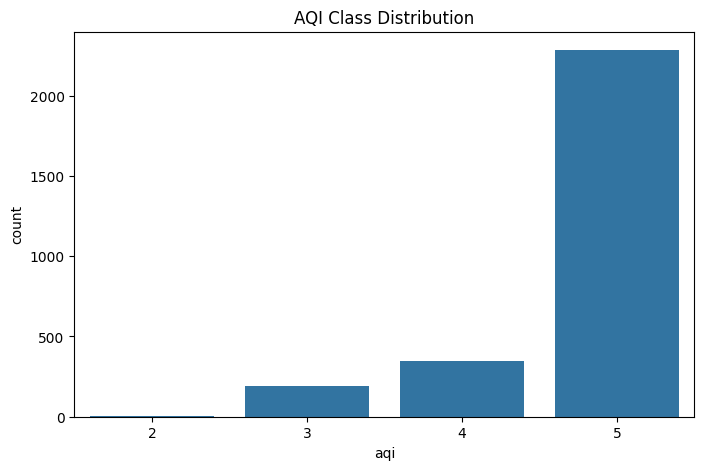

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df["aqi"] = df["aqi"].astype(int)
plt.figure(figsize=(8,5))
sns.countplot(x="aqi", data=df)
plt.title("AQI Class Distribution")
plt.show()


In [7]:
df["aqi"].value_counts(normalize=True) * 100


aqi
5    80.763791
4    12.199434
3     6.859972
2     0.176803
Name: proportion, dtype: float64

## Time Trend Analysis

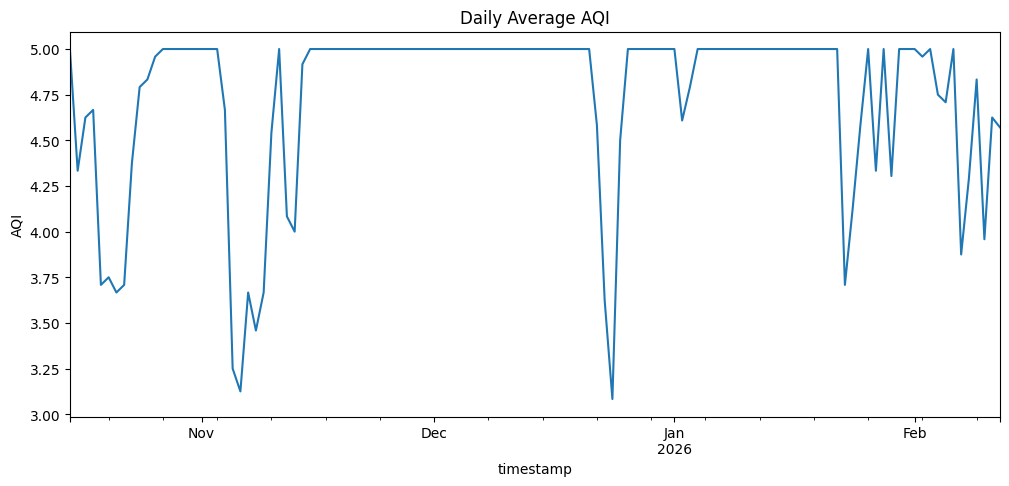

In [8]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

df.set_index("timestamp")["aqi"].resample("D").mean().plot(figsize=(12,5))
plt.title("Daily Average AQI")
plt.ylabel("AQI")
plt.show()


## Hourly Pattern

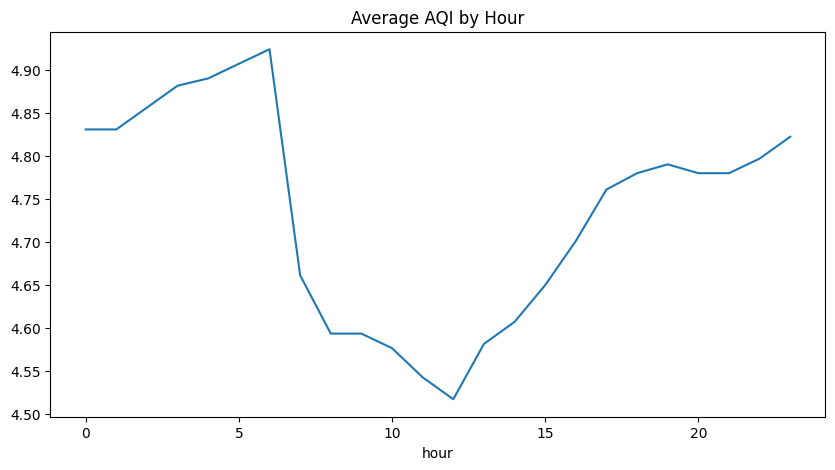

In [9]:
df["hour"] = df["timestamp"].dt.hour

plt.figure(figsize=(10,5))
df.groupby("hour")["aqi"].mean().plot()
plt.title("Average AQI by Hour")
plt.show()


## Feature Correlation Heatmap

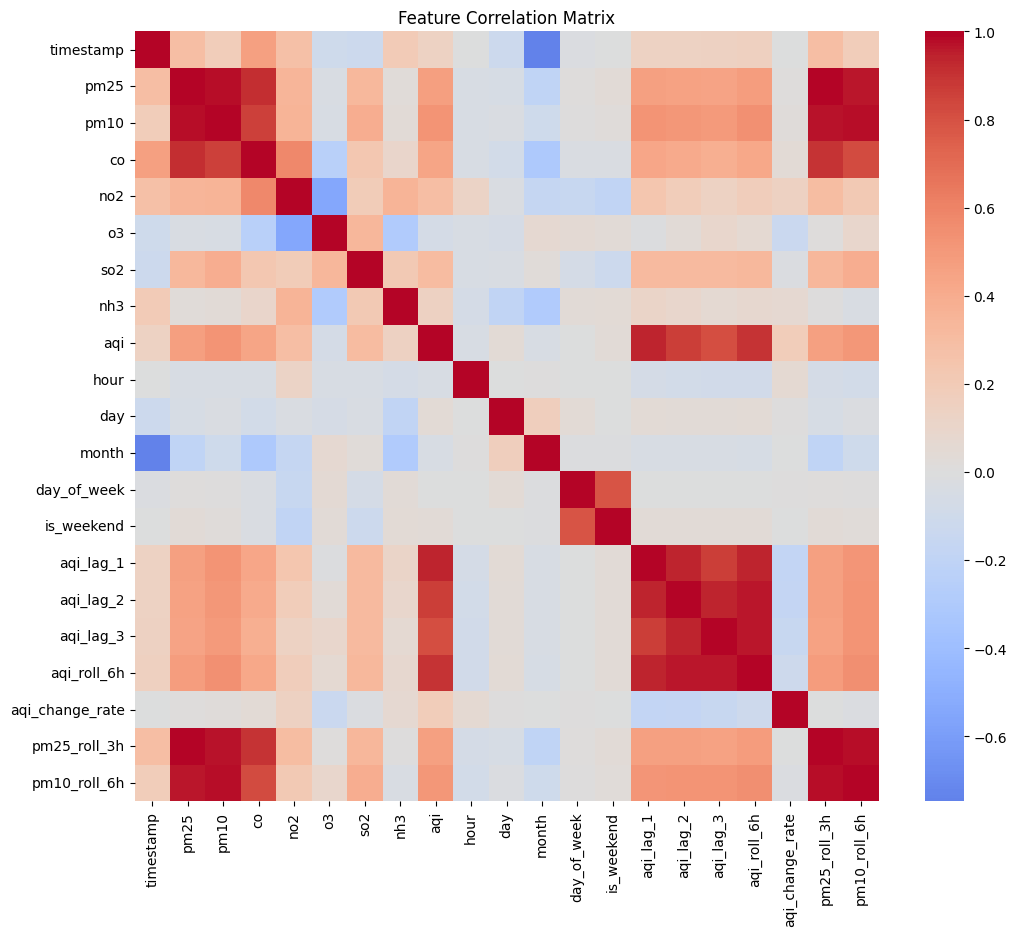

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


## PM2.5 Trend

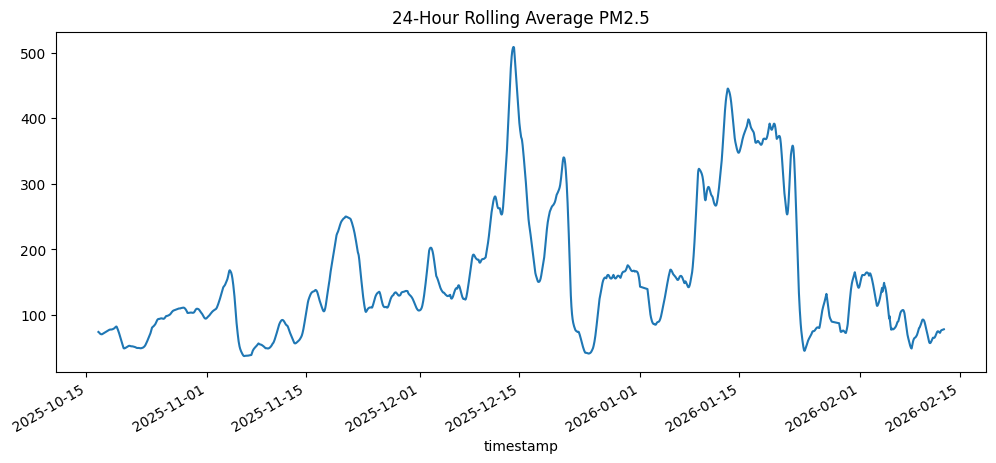

In [11]:
df.set_index("timestamp")["pm25"].rolling(24).mean().plot(figsize=(12,5))
plt.title("24-Hour Rolling Average PM2.5")
plt.show()


## Boxplots by AQI Class

2026-02-14 19:07:32,024 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-14 19:07:32,052 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


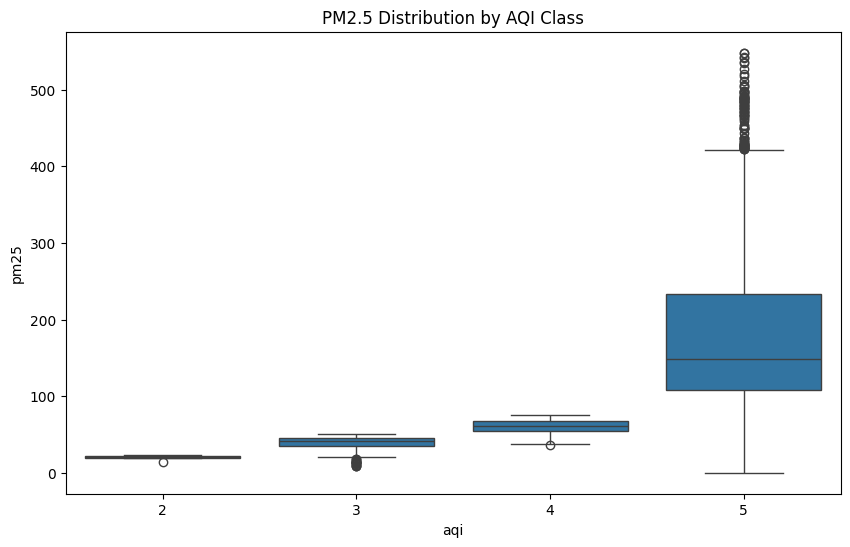

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x="aqi", y="pm25", data=df)
plt.title("PM2.5 Distribution by AQI Class")
plt.show()


## Lag Feature Validation

In [13]:
df[["aqi","aqi_lag_1","aqi_lag_2"]].corr()


,aqi,aqi_lag_1,aqi_lag_2
aqi,1.000000,0.931829,0.868823
aqi_lag_1,0.931829,1.000000,0.931829
aqi_lag_2,0.868823,0.931829,1.000000


## Seasonal Analysis

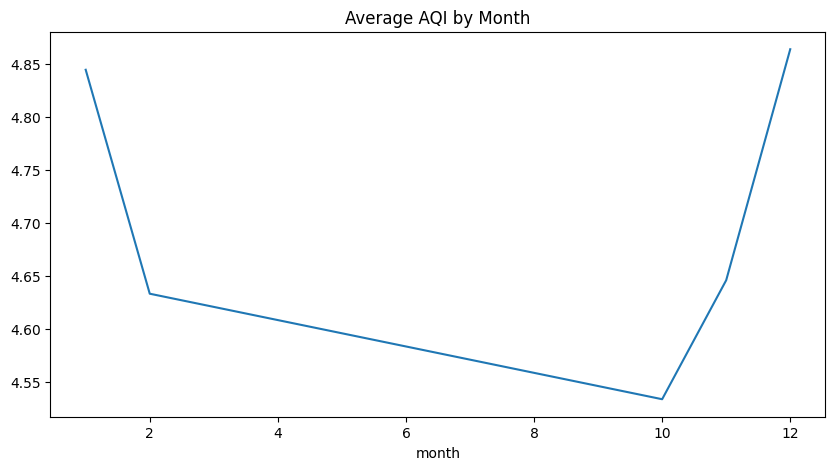

In [14]:
df["month"] = df["timestamp"].dt.month

plt.figure(figsize=(10,5))
df.groupby("month")["aqi"].mean().plot()
plt.title("Average AQI by Month")
plt.show()
